In [3]:
import numpy as np

In [4]:
raio = 15

In [5]:
# calculano a área da circunferencia pela fórmula clássica (para servir de comparação dos métodos numéricos)
area_circunferencia = np.pi * raio ** 2
area_circunferencia

706.8583470577034

In [6]:
# criando a função que representa a circunferência de raio 'r' centrada na origem (0, 0)
def  circunferencia(x, r):
    """
    Função que calcula o valor da equação da circunferência de raio 'r' centrada em (xc, yc) para um dado valor de x.

    :param r: raio da circunferência
    :param x: coordenada x que será calculada 'f(x)'

    :return: valor de 'f(x)' para a equação da circunferência
    """

    # calculando o valor de 'y' para a equação da circunferência
    y = (r ** 2 - x ** 2) ** 0.5

    return y

In [7]:
def checa_dominio(valor_minimo, valor_maximo, valor_checar):
    """
    Função que verifica se um valor está dentro de um intervalo.

    :param valor_minimo: valor mínimo do intervalo
    :param valor_maximo: valor máximo do intervalo
    :param valor: valor a ser verificado

    :return: True se o valor está dentro do intervalo, False caso contrário
    """

    return valor_minimo <= valor_checar <= valor_maximo

---
# Método de Metrópolis
### Calculando a área de uma **circunferência**

In [22]:
# quantidade de pontos a serem gerados aleatoriamente
qtd_pontos = 10000
qtd_pontos

10000

In [23]:
# metropolis

# quantidade de pontos internos começa com zero!!!
internos = 0

# lista que armazenará os pontos gerados
pontos = []
for i in range(qtd_pontos):
    # np.random.uniform() sorteia um número aleatório no intervalo [0, 1)
    # np.random.uniform(a, b) sorteia um número aleatório no intervalo [a, b)
    # como: range_sorteio = [-r, r], então np.random.uniform(*range_sorteio) sorteia um número aleatório no intervalo [-r, r)
    # o '*' desempacota a lista range_sorteio em seus elementos, ou seja, -r, r (preenchendo os parâmetros da função np.random.uniform())
    x = np.random.uniform(low=-raio, high=raio)
    y = np.random.uniform(low=-raio, high=raio)

    dentro = False
    # se o valor sorteado 'y' estiver dentro do intervalo da circunferência, para o valor de 'x' sorteado, então o ponto está dentro da circunferência
    if checa_dominio(valor_minimo=-circunferencia(x=x, r=raio), 
                     valor_maximo=circunferencia(x=x, r=raio), 
                     valor_checar=y):

        internos += 1
        dentro = True
    
    # guardando os pontos e seus respectivos status (dentro ou fora da circunferência) para plotá-los posteriormente
    pontos.append((x, y, dentro))

externos = qtd_pontos - internos
internos, externos

(7857, 2143)

In [24]:
# calculando a área do retangulo (mesa) que circunscreve a circunferência
area_retangulo = (2 * raio) ** 2
area_retangulo

900

In [25]:
# expressão de metropolis para o cálculo da área da figura (circunferência)
area_circunferencia_metropolis = area_retangulo / (1 + externos / internos)
area_circunferencia_metropolis

707.1300000000001

In [26]:
# matplotlib dispoe de recursos para plotar gráficos
import matplotlib.pyplot as plt

# tqdm é uma biblioteca que permite criar barras de progresso para loops (for, while, etc.)
from tqdm import tqdm

In [27]:
# A função arange (do módulo numpy) é muito semelhante à função range do Python, mas ela aceita passos 'quebrados' (não inteiros)
# np.arange(3, 5, 0.5) -> 3.0, 3.5, 4.0, 4.5
# np.arange(0, 10, 2) -> 0, 2, 4, 6, 8
# np.arange(0, 10, 3.2) -> 0.0, 3.2, 6.4, 9.6

# pontos da circunferência (superior) - Esses pontos serão plotados para representar a parte de cima da circunferência
xs_superior = np.arange(-raio, raio, 0.0001)
ys_superior = circunferencia(xs_superior, raio)

# pontos da circunferência (inferior) - Esses pontos serão plotados para representar a parte de baixo da circunferência
xs_inferior = np.arange(-raio, raio, 0.0001)
ys_inferior = -circunferencia(xs_inferior, raio)

  0%|          | 0/10000 [00:00<?, ?it/s]

100%|██████████| 10000/10000 [01:39<00:00, 100.49it/s]


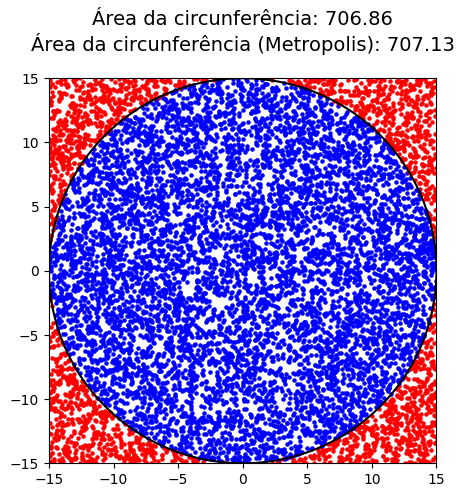

In [28]:
# gera a figura do gráfico que será plotado
plt.figure(figsize=(5, 5))

# plt.plot() plota um gráfico de linha!!!
plt.plot(xs_superior, ys_superior, color='black')
plt.plot(xs_inferior, ys_inferior, color='black')

# percorre todos os pontos gerados para plotá-los no gráfico
for x, y, dentro in tqdm(pontos):
    if dentro:
        # plt.scatter() plota um gráfico de pontos!!!
        plt.scatter(x, y, color='blue', s=5)
    else:
        # plt.scatter() plota um gráfico de pontos!!!
        plt.scatter(x, y, color='red', s=5)

# configura os limites dos eixos 'x' e 'y' do gráfico. Os eixos 'x' e 'y' vão de -raio à +raio
plt.xlim(-raio, raio)
plt.ylim(-raio, raio)

# configura o título do gráfico
# o caractere '\n', no meio de uma string, provoca uma quebra de linha (enter) no texto
plt.title(label=f'Área da circunferência: {area_circunferencia:.2f}\nÁrea da circunferência (Metropolis): {area_circunferencia_metropolis:.2f}',
          fontsize=14,
          fontweight='medium', # opcões ppossívei: ['light', 'normal', 'medium', 'semibold', 'bold', 'heavy', 'black']
          color='black', # opcões ppossívei: ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w']
          loc='center', # opcões ppossívei: ['center', 'left', 'right']
          pad=20)

plt.show()

---
# Método de Pick
### Calculando a área de uma **circunferência**

In [16]:
# o pacote itertools é utilizado para combinar todos os pontos horizontais e verticais
import itertools

In [17]:
# será uma grade de 100x100 pontos (10.000 pontos)
qtd_pontos = 100

aproximacao_maxima = 1e-1

# np.linspace(a, b, n) gera 'n' pontos igualmente espaçados no intervalo [a, b]
# np.linspace(0, 10, 5) -> 0, 2.5, 5, 7.5, 10
# np.linspace(0, 10, 3) -> 0, 5, 10
horizontal = np.linspace(-raio, raio, qtd_pontos)
vertical = np.linspace(-raio, raio, qtd_pontos)

# itertools.product() gera o produto cartesiano de dois iteráveis
# itertools.product([1, 2], [3, 4]) -> (1, 3), (1, 4), (2, 3), (2, 4)
grade = itertools.product(horizontal, vertical)

# inicialmente, a quantidade de pontos internos e fronteiras é zero
internos = 0
fronteiras = 0

# lista que armazenará os pontos gerados para plotá-los posteriormente
pontos = []
for x, y in grade:

    # calculando os limites superior e inferior da circunferência para o valor de 'x' sorteado. Esses limites vão servir para verificar se o ponto 'y' 
    # está dentro da circunferência ou não
    limite_superior = circunferencia(x, raio)
    limite_inferior = -circunferencia(x, raio)

    # inicialmente, todos os pontos são considerados 'fora' da circunferência
    situacao = "fora"
    if abs(y - limite_superior) <= aproximacao_maxima or abs(y - limite_inferior) <= aproximacao_maxima:
        # se o ponto se aproximar (até uma certa margem de erro) da circunferência, ele é considerado uma fronteira (ou seja, está na borda da circunferência)
        fronteiras += 1
        situacao = "fronteira"
    
    elif checa_dominio(valor_minimo=limite_inferior,
                       valor_maximo=limite_superior,
                       valor_checar=y):
        # se o ponto estiver dentro do intervalo da circunferência, e não for uma fronteira, então ele é considerado 'dentro' da circunferência
        internos += 1
        situacao = "dentro"
    
    # se nenhum dos casos acima for satisfeito, o ponto é considerado 'fora' da circunferência
    pontos.append((x, y, situacao))
    
internos, fronteiras

(7628, 128)

In [19]:
# área de pick é calculada pela fórmula: (internos + fronteiras / 2 - 1) * areazinha (veja o que é areazinha no pdf da modelagem)
area_circunferencia_pick = (internos + fronteiras / 2 - 1) * (2 * raio / qtd_pontos) ** 2
area_circunferencia_pick

692.1899999999999

100%|██████████| 10000/10000 [01:35<00:00, 105.07it/s]


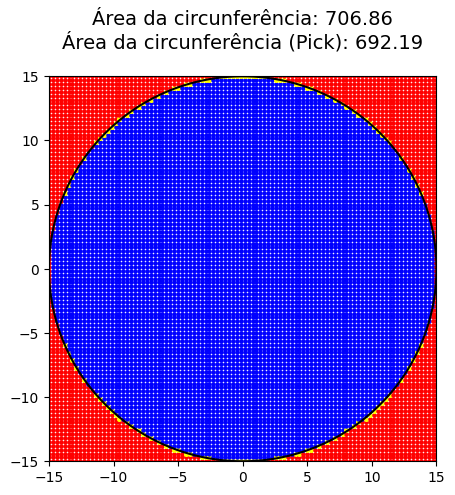

In [75]:
# cria a figura do gráfico que será plotado (tamanho 5x5 polegadas)
plt.figure(figsize=(5, 5))

# plota a circunferência (superior e inferior) com um gráfico de linha (plot)
plt.plot(xs_superior, ys_superior, color='black')
plt.plot(xs_inferior, ys_inferior, color='black')

# percorre todos os pontos para plotá-los de acordo com a situação de cada um (dentro, fora ou fronteira)
for x, y, situacao in tqdm(pontos):
    if situacao == "dentro":
        # plota um ponto (scatter) azul para representar os pontos 'dentro' da circunferência
        plt.scatter(x, y, color='blue', s=5)
    elif situacao == "fronteira":
        # plota um ponto (scatter) amarelo para representar os pontos 'fronteira' da circunferência
        plt.scatter(x, y, color='yellow', s=7)
    else:
        # plota um ponto (scatter) vermelho para representar os pontos 'fora' da circunferência
        plt.scatter(x, y, color='red', s=5)

# configura os limites dos eixos 'x' e 'y' do gráfico. Os eixos 'x' e 'y' vão de -raio à +raio
plt.xlim(-raio, raio)
plt.ylim(-raio, raio)

# configura o título do gráfico
plt.title(label=f'Área da circunferência: {area_circunferencia:.2f}\nÁrea da circunferência (Pick): {area_circunferencia_pick:.2f}',
          fontsize=14,
          fontweight='medium', # ['light', 'normal', 'medium', 'semibold', 'bold', 'heavy', 'black']
          color='black', # ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w']
          loc='center', # ['center', 'left', 'right']
          pad=20)

plt.show()

In [ ]:
# a função 'abs' retorna o valor absoluto (módulo) de um número

In [71]:
# numa f-string, o que está entre chaves '{}' é uma expressão Python que será avaliada e seu resultado será convertido para string, 
# enquanto, o que está fora das chaves é uma string literal
f"Erro Metropolis: {abs(area_circunferencia_metropolis - area_circunferencia) / area_circunferencia:.2%}"

'Erro Metropolis: 0.39%'

In [72]:
f"Erro Pick: {abs(area_circunferencia_pick - area_circunferencia) / area_circunferencia:.2%}"

'Erro Pick: 2.08%'